Primer empleo

In [42]:
import numpy 
from tkinter import *
from tkinter import messagebox as MessageBox
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns 
#from tabulate import tabulate
#from sodapy import Socrata
from xlsxwriter import Workbook

plt.figure(figsize=(15,30))
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
path=r'Datos.xlsx'

font1 = {'family':'Comic Sans MS','size':20}
font2 = {'family':'Comic Sans MS','size':15}

# Cargue y lectura de los datos

In [43]:
data = pd.read_csv('empleo.csv')

# Encabezado de datos

In [44]:
data.head()

,Tipo Documento,Canal de Registro,Edad,Género,Nivel de Estudio,Título Homologado,Ciudad de Residencia,Fecha Registro,Programa de Gobierno,Condiciones Especiales,Situación Laboral,Fecha Actualización,Zona,Mes,Año,Punto Atención,Rango Edad
0,Cédula de Ciudadanía,Agencia,39,F,Media(10-13),BACHILLER ACADÉMICO,BARRANQUILLA,03/01/2020 02:22:50 p.m.,NaN,NaN,Desempleado,03/01/2020 02:22:50 p.m.,Urbano,1,"2,020",Barrios Modelo,29 - 39
1,Cédula de Ciudadanía,Agencia,40,F,Universitaria,ENFERMERA,BARRANQUILLA,07/01/2020 08:29:56 a.m.,NaN,NaN,Desempleado,07/01/2020 08:29:56 a.m.,Urbano,1,"2,020",Barrios Modelo,40 - 50
2,Cédula de Ciudadanía,Agencia,24,M,Técnica Profesional,OPERACIÓN DE PROCESOS INDUSTRIALES,BARRANQUILLA,07/01/2020 10:23:32 a.m.,NaN,NaN,Primer Empleo,07/01/2020 10:23:32 a.m.,Urbano,1,"2,020",Barrios Modelo,18 - 28
3,Cédula de Ciudadanía,Agencia,22,M,Media(10-13),BACHILLER ACADEMICO,BARRANQUILLA,07/01/2020 11:04:52 a.m.,NaN,NaN,Desempleado,07/01/2020 11:04:52 a.m.,Urbano,1,"2,020",Barrios Modelo,18 - 28
4,Cédula de Ciudadanía,Agencia,23,F,Universitaria,INGENIERA AMBIENTAL,BARRANQUILLA,09/01/2020 09:48:22 a.m.,NaN,NaN,Desempleado,09/01/2020 09:48:22 a.m.,Urbano,1,"2,020",Barrios Modelo,18 - 28


# Creando nuevo dataframe

In [45]:
newdata=data.copy

#Guardando datos filtrados en el nuevo dataframe 

In [46]:

df_filtro=data[(data['Situación Laboral']!="Desempleado") & (data['Situación Laboral']!='Cesante por Emergencia Sanitaria') & (data['Ciudad de Residencia']!='BOGOTÁ, D.C.')& (data['Situación Laboral']!='NO REGISTRA')]


# Renombrar encabezados

In [47]:
df_filtro =df_filtro.rename (columns={
    "Tipo Documento" :"Tipo_Documento",
    "Canal de Registro":"Canal_Registro",
    "Edad":"Edad",
    'Género': 'Genero',
    "Nivel de Estudio": "Nivel_Estudio",
    'Título Homologado' :'Titulo_Homologado',
    'Ciudad de Residencia':'Ciudad_Residencia',
    'Fecha Registro':'Fecha_Registro',
    'Programa de Gobierno':'Programa_Gobierno',
    'Condiciones Especiales':'Condiciones_Especiales',
    'Situación Laboral':'Situación_Laboral',
    'Fecha Actualización':'Fecha_Actualizacion',
    'Zona':'Zona',
    'Mes':'Mes',
    'Año':"anio",
    'Punto Atención':'Punto_Atencion',
    'Rango Edad':'Rango_Edad'
})
df_filtro.columns

Index(['Tipo_Documento', 'Canal_Registro', 'Edad', 'Genero', 'Nivel_Estudio',
       'Titulo_Homologado', 'Ciudad_Residencia', 'Fecha_Registro',
       'Programa_Gobierno', 'Condiciones_Especiales', 'Situación_Laboral',
       'Fecha_Actualizacion', 'Zona', 'Mes', 'anio', 'Punto_Atencion',
       'Rango_Edad'],
      dtype='object')

# creacion de dataframe para cada año de pandemia 

In [48]:
anio2021=df_filtro[df_filtro['anio']=="2,021"]
anio2020=df_filtro[df_filtro['anio']=="2,020"]
print("Realizado")

Realizado


En la grafica anterior podemos apreciar que el numero de mujeres atendidas y consuguieron empleo estos dos ultimos años fue mayor al numero de hombres  .

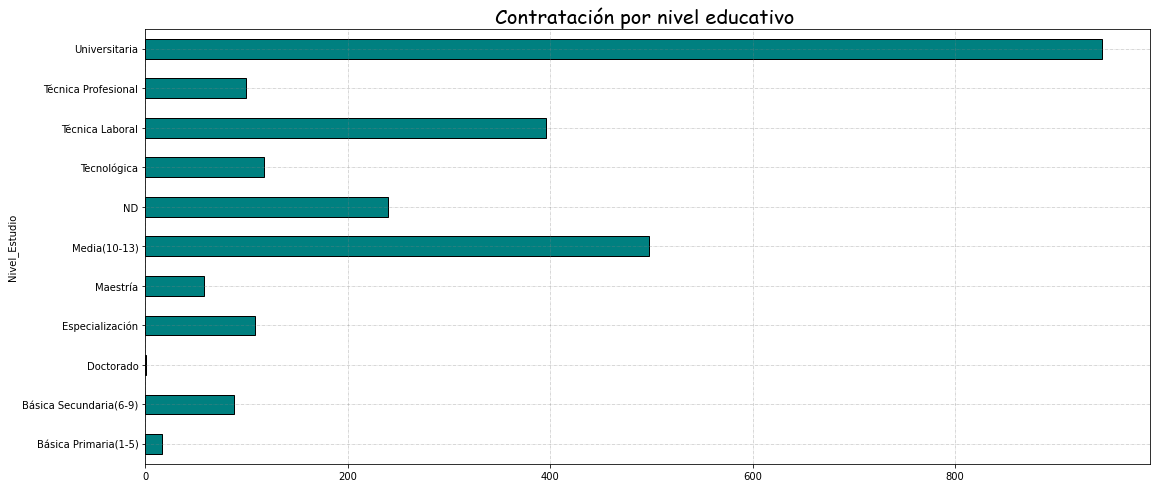

In [49]:
valor_porcarrera = df_filtro.groupby("Nivel_Estudio")["Tipo_Documento"].count()
valor_porcarrera.head(20).plot.barh(edgecolor='black',figsize=(18,8),color="teal")
plt.title("Contratación por nivel educativo ", fontdict=font1)
plt.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.6)
plt.show()

Grafico de personas empleadass organizadass por su nivel de estudios , se encuntra agrupada con la informacion de estos dos ultimos años de pandemia (2020 - 2021)

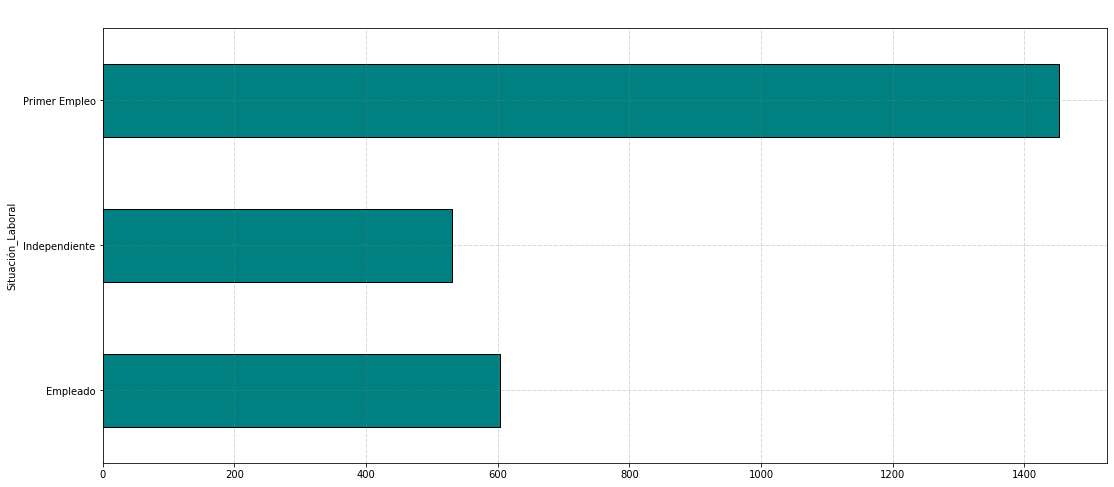

In [71]:
valor_porcarrera = df_filtro.groupby("Situación_Laboral")["Tipo_Documento"].count()
valor_porcarrera.head(20).plot.barh(edgecolor='black',figsize=(18,8),color="teal")
plt.title(" ", fontdict=font1)
plt.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.6)
plt.show()

# Grafica de porcentaje por Genero

anio   Genero
2,020  F         599
       M         474
2,021  F         797
       M         717
Name: Situación_Laboral, dtype: int64

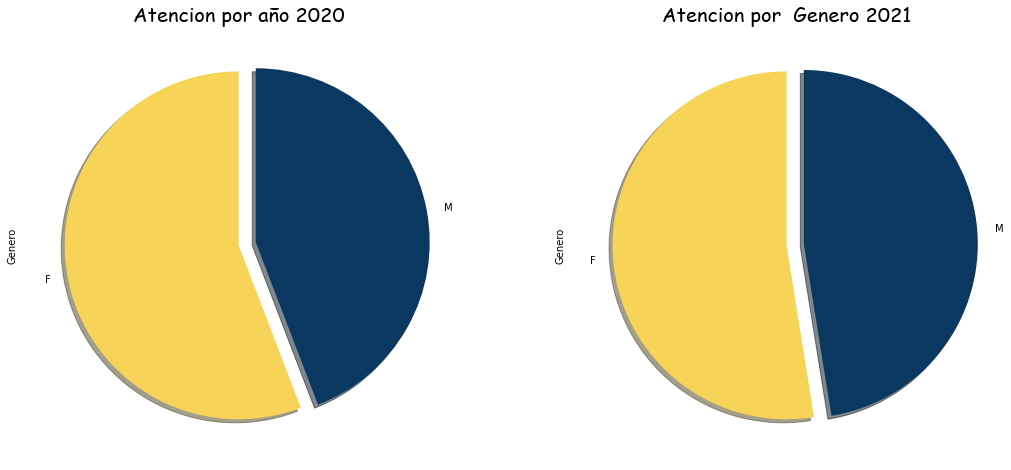

In [51]:
colors = ['#F7D358','#0B3861']
colors1=['#53A9A3','#97367A']
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(18,8))
anio2020['Genero'].value_counts().plot.pie(ax =ax1,explode =[0,0.1],  shadow =True,startangle=90,colors=colors)
ax1.set_title('Atencion por año 2020',fontdict= font1)
plt.show
anio2021['Genero'].value_counts().plot.pie(ax =ax2,explode =[0,0.1], shadow =True,startangle=90,colors=colors)
ax2.set_title('Atencion por  Genero 2021',fontdict= font1)
plt.show
df_filtro.groupby(["anio","Genero"])["Situación_Laboral"].count() 

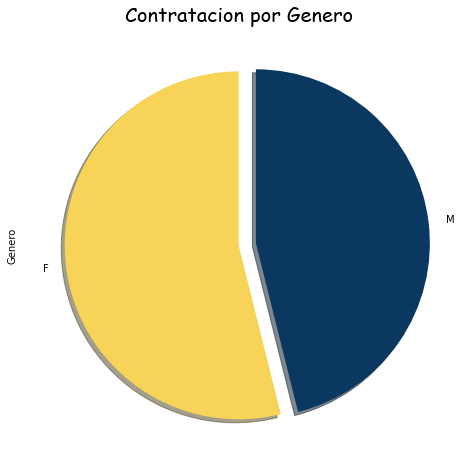

Genero
F    1396
M    1191
Name: Situación_Laboral, dtype: int64

In [52]:
df_filtro.Genero.value_counts().plot.pie(explode =[0,0.1] , shadow =True,startangle=90,  figsize =(18,8), colors=colors)
plt.title('Contratacion por Genero',fontdict= font1)
plt.show()
df_filtro.groupby(["Genero"])["Situación_Laboral"].count()

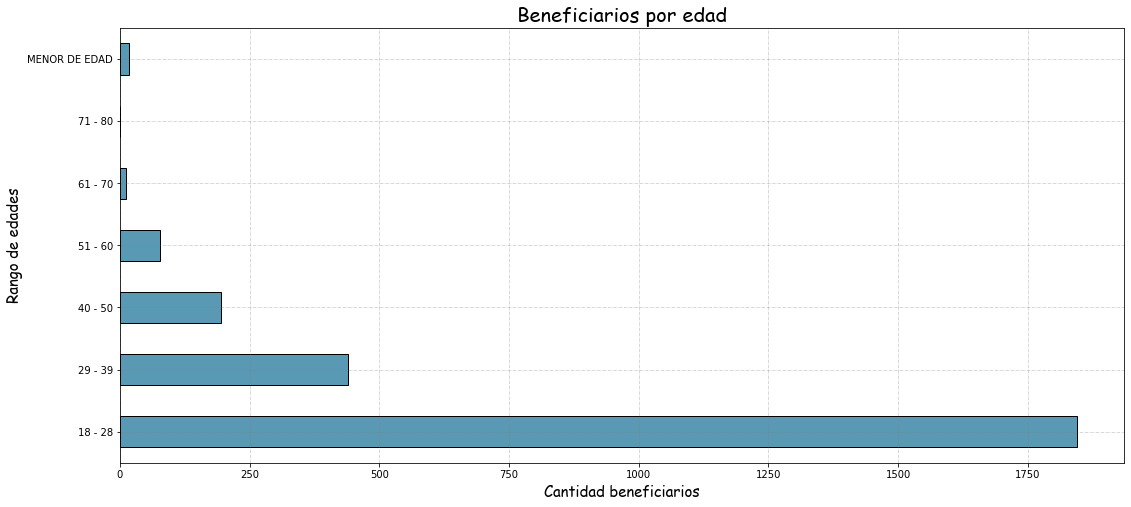

<Figure size 1296x576 with 0 Axes>

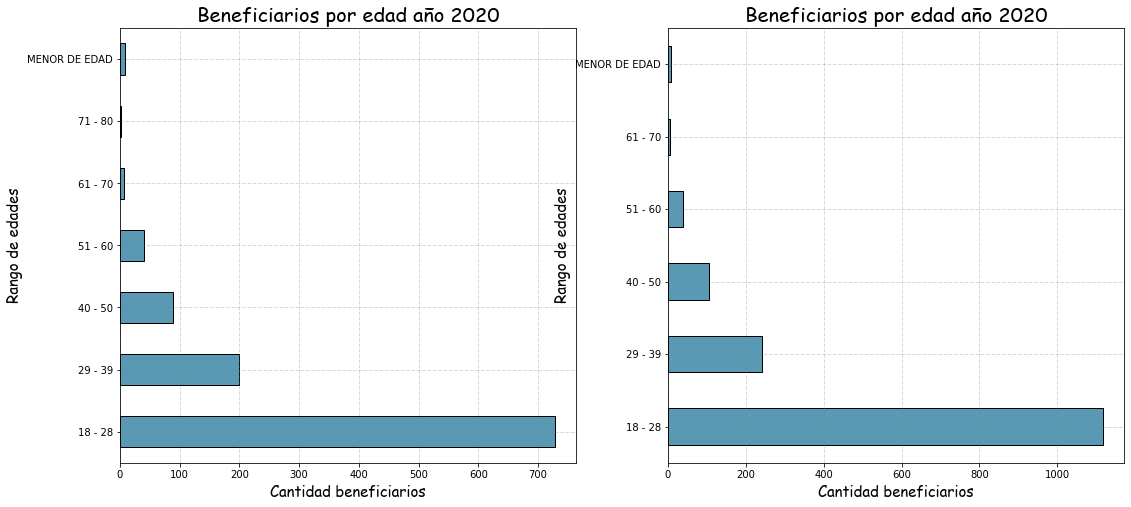

Rango_Edad
18 - 28          1844
29 - 39           440
40 - 50           194
51 - 60            78
61 - 70            12
71 - 80             1
MENOR DE EDAD      18
Name: Situación_Laboral, dtype: int64

In [53]:
Programa = df_filtro.groupby("Rango_Edad")["Situación_Laboral"].count()
Programa.head(7).plot.barh(edgecolor="black",color="#5999B3",  figsize =(18,8))
plt.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.6)
plt.title("Beneficiarios por edad",fontdict=font1)
plt.ylabel("Rango de edades", fontdict= font2)
plt.xlabel('Cantidad beneficiarios',fontdict=font2)
plt.figure( figsize =(18,8))
plt.show()

f, ax =plt.subplots(1,2 , figsize=(18,8))
#f, ax =plt.subplots(1,2,figsize=(18,8))
Programa = anio2020.groupby("Rango_Edad")["Situación_Laboral"].count()
Programa.head(7).plot.barh(edgecolor="black",color="#5999B3",  figsize =(18,8), ax=ax[0])
ax[0].grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.6)
ax[0].set_title("Beneficiarios por edad año 2020",fontdict=font1)
ax[0].set_ylabel("Rango de edades", fontdict= font2)
ax[0].set_xlabel('Cantidad beneficiarios',fontdict=font2)

Programa = anio2021.groupby("Rango_Edad")["Situación_Laboral"].count()
Programa.head(7).plot.barh(edgecolor="black",color="#5999B3",  figsize =(18,8), ax=ax[1])
ax[1].grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.6)
ax[1].set_title("Beneficiarios por edad año 2020",fontdict=font1)
ax[1].set_ylabel("Rango de edades", fontdict= font2)
ax[1].set_xlabel('Cantidad beneficiarios',fontdict=font2)
plt.show()

df_filtro.groupby(["Rango_Edad"])["Situación_Laboral"].count() 


# Histograma por año 2020 y 2021 sobre personas contratadas durante cada mes de cada año

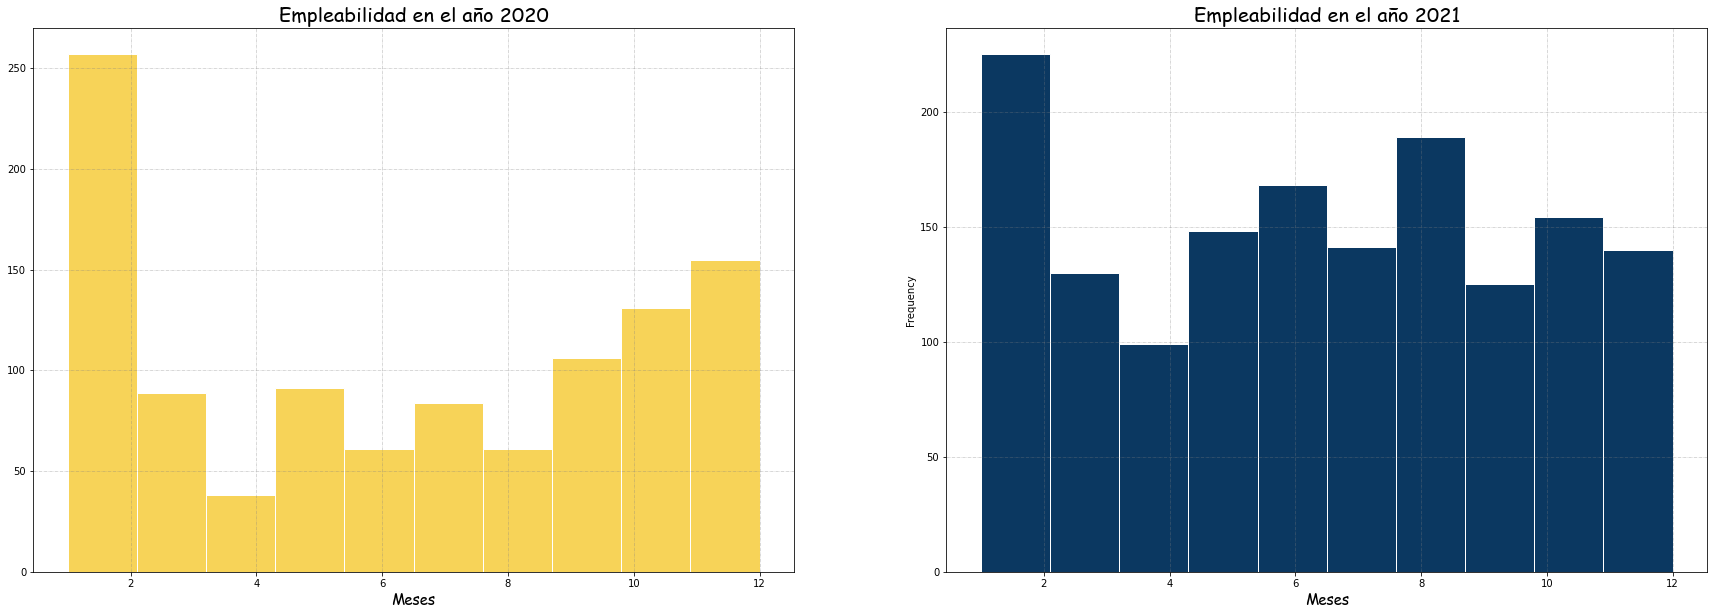

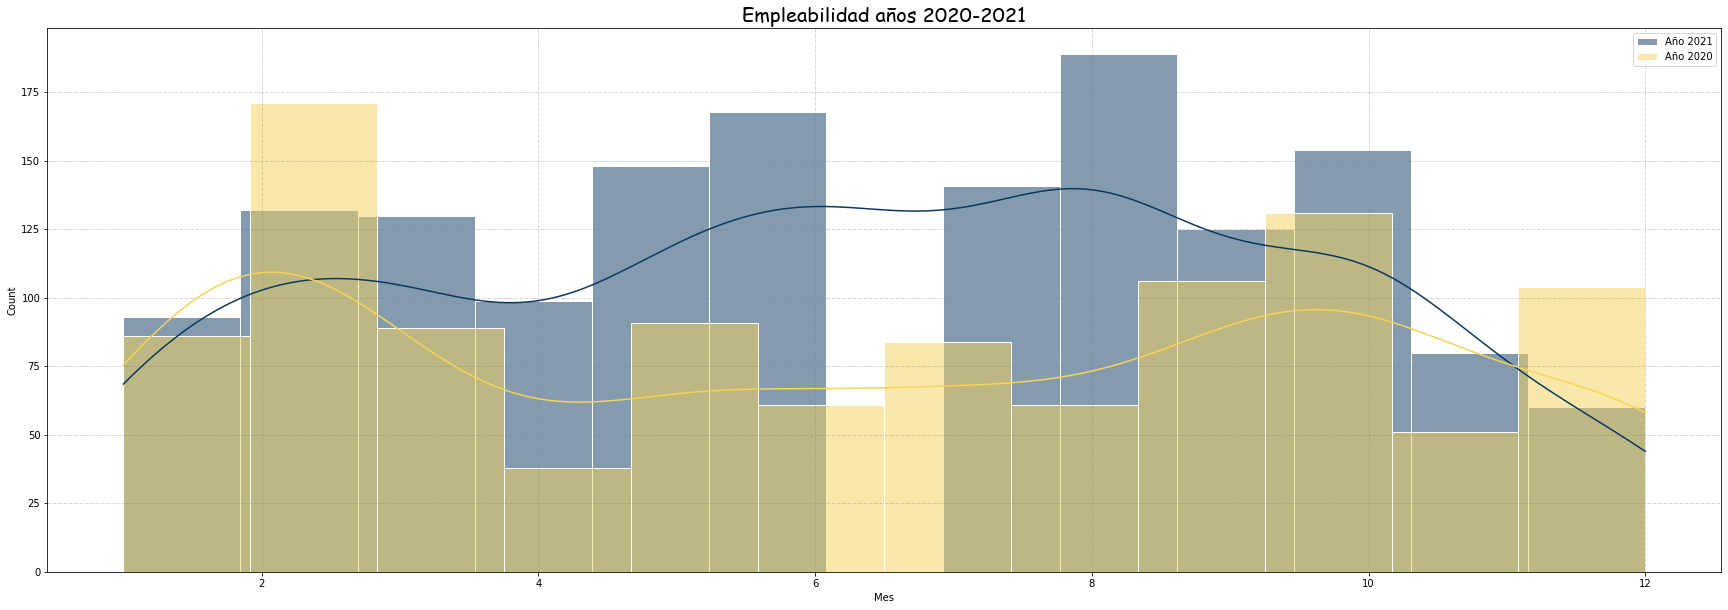

In [54]:
colors = ['#F7D358','#0B3861']
f , ax =plt.subplots(1,2,figsize=(30,10))
anio2020.Mes.plot.hist(edgecolor='white',color='#F7D358',ax=ax[0],)
anio2021.Mes.plot.hist(edgecolor='white',color='#0B3861',ax=ax[1])
ax[0].set_title ('Empleabilidad en el año 2020',fontdict = font1)
ax[0].set_xlabel('Meses', fontdict = font2)
ax[0].set_ylabel('')
ax[0].grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.6)
ax[1].set_title ('Empleabilidad en el año 2021',fontdict = font1)
ax[1].set_xlabel('Meses', fontdict = font2)
ax[1].grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.6)
plt.show

plt.figure(figsize=(30,10))
sns.histplot(data=anio2021 , x="Mes" ,color="#0B3861", kde=True, label="Año 2021",edgecolor='white')
sns.histplot(data=anio2020 , x="Mes",color="#F7D358", kde=True, label="Año 2020",edgecolor='white')
plt.title("Empleabilidad años 2020-2021", font=font1)
plt.legend() 
plt.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.6)



plt.show()

In [70]:
'''plt.figure(figsize=(10,5))
plt.bar(anio2021.Rango_Edad  ,anio2021.Edad)
plt.title('Rango de edad')
ax = plt.subplot()  # Axis
ax.set_xlabel('Género')
ax.set_ylabel('Poblacion')
plt.show()'''



"plt.figure(figsize=(10,5))\nplt.bar(anio2021.Rango_Edad  ,anio2021.Edad)\nplt.title('Rango de edad')\nax = plt.subplot()  # Axis\nax.set_xlabel('Género')\nax.set_ylabel('Poblacion')\nplt.show()"

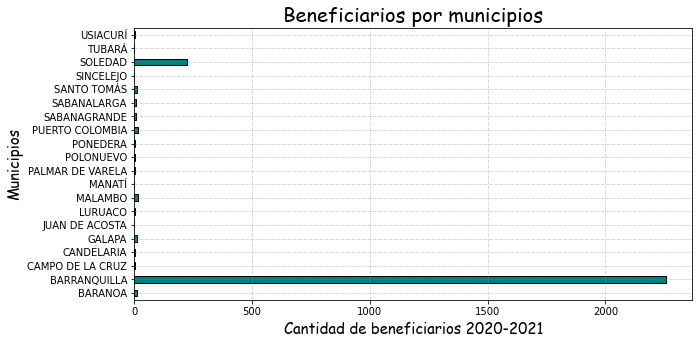

<Figure size 1296x576 with 0 Axes>

<function matplotlib.pyplot.legend(*args, **kwargs)>

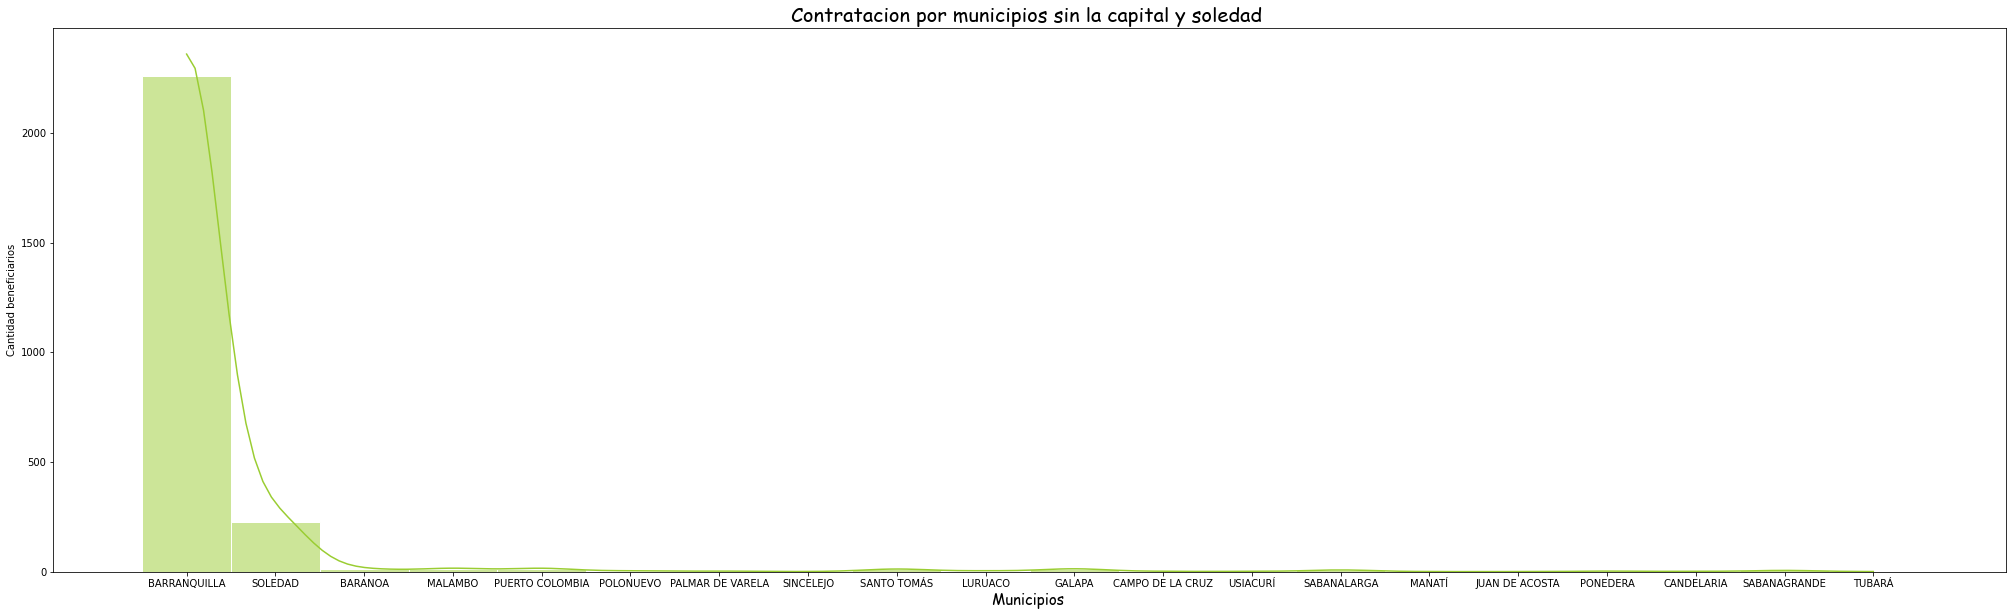

In [56]:
plt.figure(figsize=(10,5))
valor_por_ciudad = df_filtro.groupby("Ciudad_Residencia")["Situación_Laboral"].count()
valor_por_ciudad.head(20).plot.barh(edgecolor="black",color="teal")
plt.title("Beneficiarios por municipios",fontdict=font1)
plt.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.6)
plt.ylabel("Municipios", fontdict= font2)
plt.xlabel('Cantidad de beneficiarios 2020-2021',fontdict=font2)
plt.figure( figsize =(18,8))
plt.show()


plt.figure(figsize=(35,10))
sns.histplot(data=df_filtro , x="Ciudad_Residencia" ,color="#9ACD32", kde=True, label="Año 2021",edgecolor='white')
plt.title("Contratacion por municipios sin la capital y soledad ", fontdict=font1)
plt.xlabel("Municipios ", fontdict=font2)
plt.ylabel("Cantidad beneficiarios")
plt.legend

In [57]:
NB1=df_filtro[df_filtro['Ciudad_Residencia']!="BARRANQUILLA"]

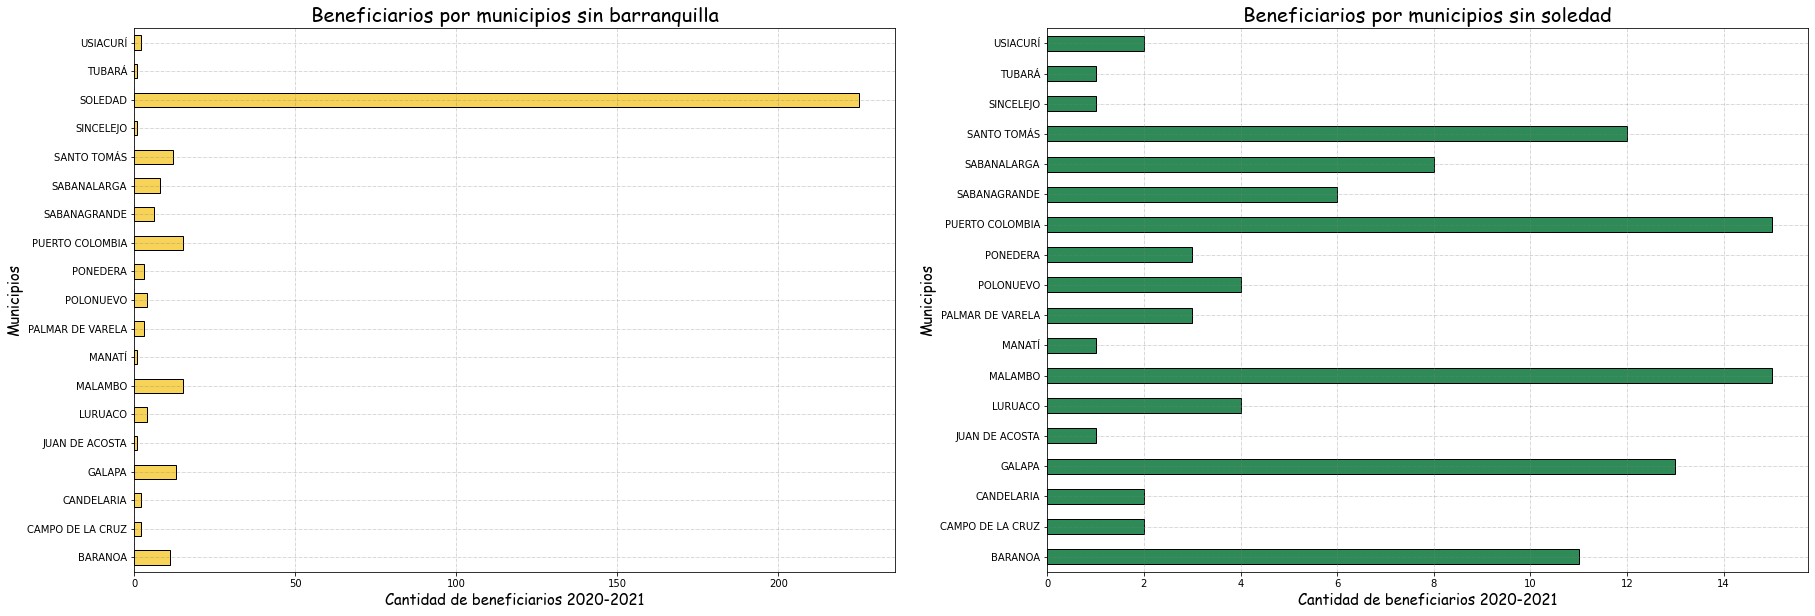

In [58]:
NB2=NB1[df_filtro['Ciudad_Residencia']!="SOLEDAD"]
f , ax =plt.subplots(1,2,figsize=(30,10))
valor_por_ciudad = NB1.groupby("Ciudad_Residencia")["Situación_Laboral"].count()
valor_por_ciudad.head(20).plot.barh(edgecolor="black",color="#F7D358",ax=ax[0])
ax[0].set_title("Beneficiarios por municipios sin barranquilla",fontdict=font1)
ax[0].set_ylabel("Municipios", fontdict= font2)
ax[0].set_xlabel('Cantidad de beneficiarios 2020-2021',fontdict=font2)
ax[0].grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.6)

valor_por_ciudad2 = NB2.groupby("Ciudad_Residencia")["Situación_Laboral"].count()
valor_por_ciudad2.head(20).plot.barh(edgecolor="black",color="seagreen",ax=ax[1])
ax[1].set_title("Beneficiarios por municipios sin soledad",fontdict=font1)
ax[1].set_ylabel("Municipios", fontdict= font2)
ax[1].grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.6)

plt.xlabel('Cantidad de beneficiarios 2020-2021',fontdict=font2)
plt.show()

Text(0, 0.5, 'Cantidad beneficiarios')

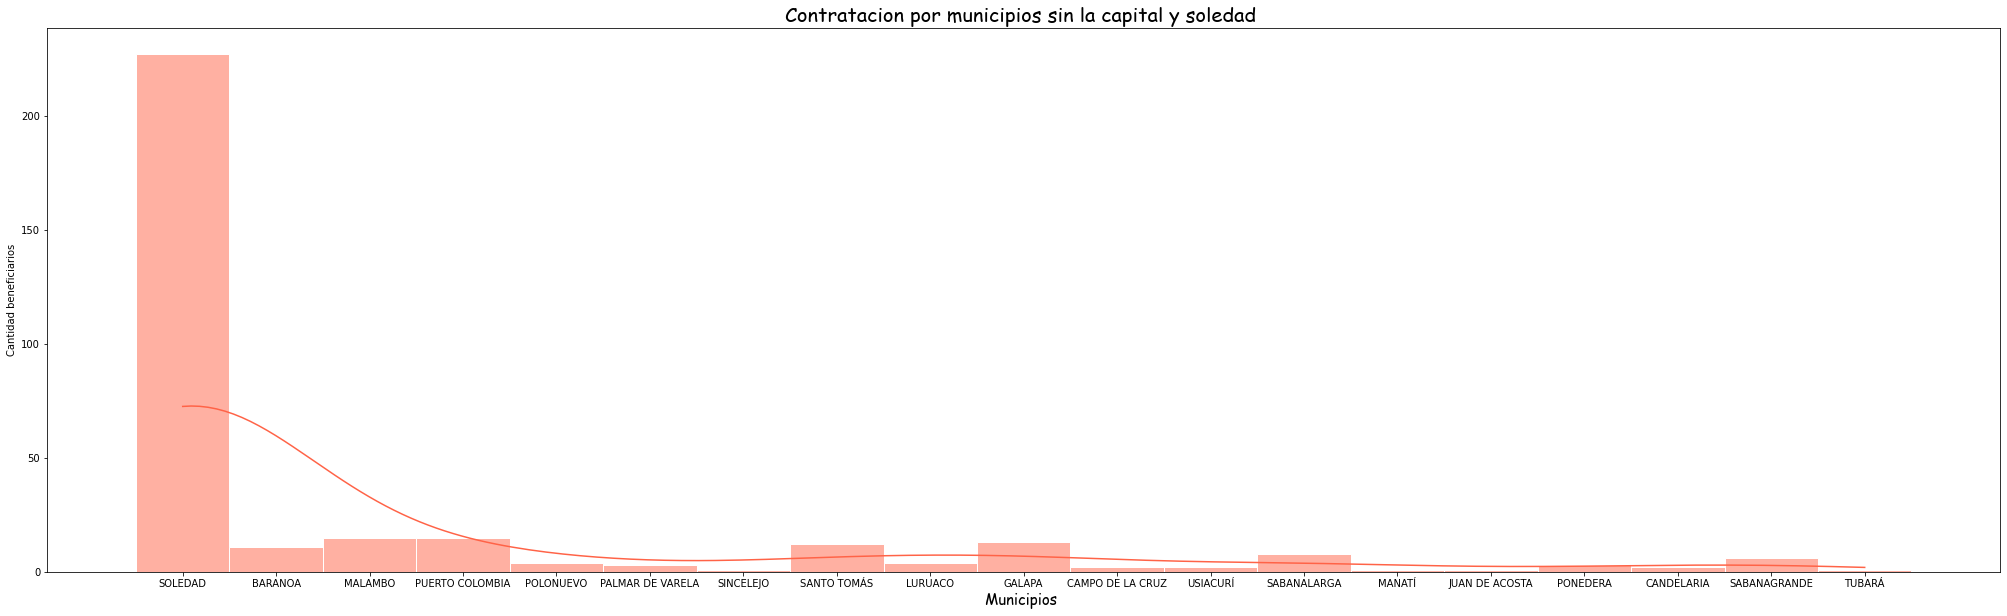

In [59]:
tabl1=df_filtro.groupby(["Ciudad_Residencia"])["Situación_Laboral"].count()
tabl2=df_filtro.groupby(["Programa_Gobierno"])["Situación_Laboral"].count()
plt.figure(figsize=(35,10))
sns.histplot(data=NB1 , x="Ciudad_Residencia" ,color="#FF6347", kde=True, label="Año 2021",edgecolor='white')
plt.title("Contratacion por municipios sin la capital y soledad ", fontdict=font1)
plt.xlabel("Municipios ", fontdict=font2)
plt.ylabel("Cantidad beneficiarios")

<function matplotlib.pyplot.legend(*args, **kwargs)>

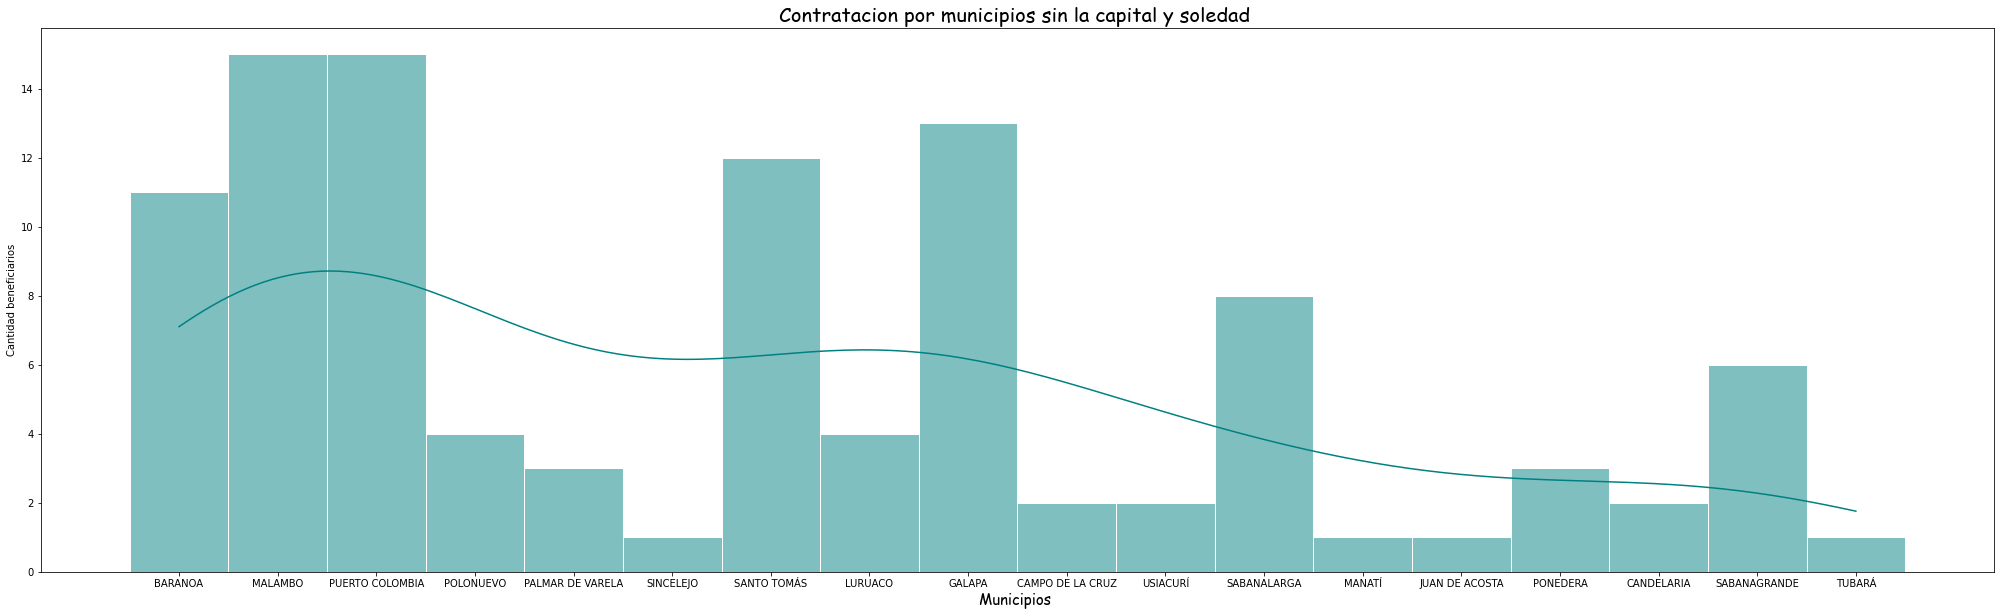

In [60]:
#print(tabulate(tabl1.head, headers='keys', tablefmt='fancy_grid',))
plt.figure(figsize=(35,10))
sns.histplot(data=NB2 , x="Ciudad_Residencia" ,color="teal", kde=True, label="Año 2021",edgecolor='white')
#plt.text(0.95, 0.05, 'Saul Benedetty',fontsize=50, color='gray',ha='right', va='bottom', alpha=0.5)
plt.title("Contratacion por municipios sin la capital y soledad ", fontdict=font1)
plt.xlabel("Municipios ", fontdict=font2)
plt.ylabel("Cantidad beneficiarios")
plt.legend




Guardar en xlsx

In [73]:
'''writer = pd.ExcelWriter(path, engine = 'xlsxwriter')
df_filtro.to_excel(writer, sheet_name = 'Poblacion ')
anio2020.to_excel(writer, sheet_name = 'Año2020 ')
anio2021.to_excel(writer, sheet_name = 'Año2021 ')
writer.save()
writer.close()

from tkinter import * 
from tkinter import messagebox
messagebox.showinfo("Archivo", "Se creo el archivo datos.xlsx")
'''

plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>